
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━

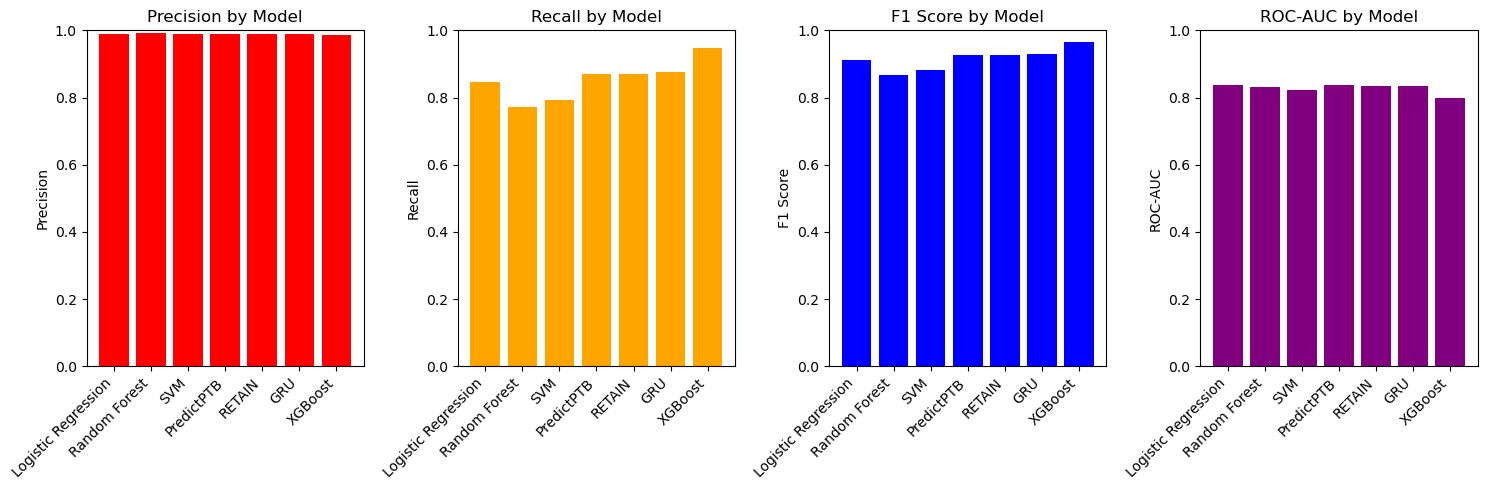

                 Model  Precision  Recall  F1 Score  ROC-AUC
0  Logistic Regression      0.990   0.847     0.912    0.837
1        Random Forest      0.991   0.772     0.868    0.831
2                  SVM      0.990   0.794     0.881    0.822
3           PredictPTB      0.990   0.870     0.925    0.836
4               RETAIN      0.990   0.869     0.925    0.835
5                  GRU      0.990   0.877     0.930    0.835
6              XGBoost      0.986   0.947     0.966    0.800


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data from a CSV file
df = pd.read_csv('D:/Users/yipeng_wei/Documents/dl data/2024-06-28/df_dl.csv')
ml = pd.read_csv('D:/Users/yipeng_wei/Documents/dl data/2024-06-28/df_ml.csv')

# Drop rows with NaN in the target column before any operations
df = df.dropna(subset=['STILLBIRTH_SIGNS_LIFE'])
ml = ml.dropna(subset=['STILLBIRTH_SIGNS_LIFE'])

# Normalize specified features before imputing missing values
features_to_normalize = ['age', 'bmi_enroll', 'muac']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the specified features in both dataframes
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])
ml[features_to_normalize] = scaler.fit_transform(ml[features_to_normalize])

# Selecting features and the target
features_1 = ["ANEMIA_OUTCOME1", "Visit", "SITE",
               "INF_PRES_CEPH", "INF_PRES_BREECH", "INF_PRES_TRANS", "INF_PRES_BROW", "INF_PRES_OTHER",
               "ASPHYXIA_IND", "STILLBIRTH_IND", "PRETERM_IND", "POSTTERM_IND", "GEST_HTN_IND", "PREECLAMPSIA_IND", "GEST_DIAB_IND", "PREMATURE_RUPTURE_IND", "OBSTR_LABOR_IND",
               "miscarriage", "paid_work", "PARITY_2", "PARITY_1", "WEALTH_QUINT_1", "WEALTH_QUINT_2", "WEALTH_QUINT_3", "WEALTH_QUINT_4", "SCHOOL_MORE10", "water_improved", "toilet_improved", "M03_STOVE_FCORRESR_ind", "hh_smoke",
               "age", "bmi_enroll", "muac",
               "AGP", "CRP", "HIGH_TG_44", "FOL_SERUM", "VITB12_HOL", "VITB12_COB", "RBP4", "STFR", "FERRITIN70",
               "MCV", "MEM_CES", "MEM_ART", "MEM_SPON", "LABOR_ANY", "PRO_LABOR", "OBS_LABOR", "PRETERM_ANY", "DIAB_OVERT", "DEPR",
               "HEM_APH", "HIV_POSITIVE_ENROLL", "SYPH_POSITIVE_ENROLL", "GON_POSITIVE_ENROLL", "CHL_POSITIVE_ENROLL", "GENU_POSITIVE_ENROLL", "OTHR_POSITIVE_ENROLL", "MAL_POSITIVE_ENROLL", "HBV_POSITIVE_ENROLL", "HCV_POSITIVE_ENROLL", "TB_SYMP_POSITIVE_ENROLL",
               "IRON_Supplement", "M04_IFA_CMOCCUR", "M04_CALCIUM_CMOCCUR", "M04_VITAMIN_A_CMOCCUR", "M04_MICRONUTRIENT_CMOCCUR", "M04_ANTHELMINTHIC_CMOCCUR"]

X = df[features_1]
y = df['STILLBIRTH_SIGNS_LIFE']

# Selecting features and the target for ml dataset
features_2 = ["ANEMIA_OUTCOME1_ANC20", "ANEMIA_OUTCOME1_ANC32", "SITE",
               "INF_PRES_CEPH", "INF_PRES_BREECH", "INF_PRES_TRANS", "INF_PRES_BROW", "INF_PRES_OTHER",
               "ASPHYXIA_IND", "STILLBIRTH_IND", "PRETERM_IND", "POSTTERM_IND", "GEST_HTN_IND", "PREECLAMPSIA_IND", "GEST_DIAB_IND", "PREMATURE_RUPTURE_IND", "OBSTR_LABOR_IND",
               "miscarriage", "paid_work", "PARITY_2", "PARITY_1", "WEALTH_QUINT_1", "WEALTH_QUINT_2", "WEALTH_QUINT_3", "WEALTH_QUINT_4", "SCHOOL_MORE10", "water_improved", "toilet_improved", "M03_STOVE_FCORRESR_ind", "hh_smoke",
               "age", "bmi_enroll", "muac",
               "AGP_ANC20", "AGP_ANC32", "CRP_ANC20", "CRP_ANC32", "HIGH_TG_44_ANC20", "HIGH_TG_44_ANC32", "FOL_SERUM_ANC20", "FOL_SERUM_ANC32", "VITB12_HOL_ANC20", "VITB12_HOL_ANC32", "VITB12_COB_ANC20", "VITB12_COB_ANC32", "RBP4_ANC20", "RBP4_ANC32", "STFR_ANC20", "STFR_ANC32", "FERRITIN70_ANC20", "FERRITIN70_ANC32",
               "MCV_ANC20", "MCV_ANC32", "MEM_CES", "MEM_ART", "MEM_SPON", "LABOR_ANY", "PRO_LABOR", "OBS_LABOR", "PRETERM_ANY", "DIAB_OVERT", "DEPR_ANC20", "DEPR_ANC32",
               "HEM_APH", "HIV_POSITIVE_ENROLL", "SYPH_POSITIVE_ENROLL", "GON_POSITIVE_ENROLL", "CHL_POSITIVE_ENROLL", "GENU_POSITIVE_ENROLL", "OTHR_POSITIVE_ENROLL", "MAL_POSITIVE_ENROLL", "HBV_POSITIVE_ENROLL", "HCV_POSITIVE_ENROLL", "TB_SYMP_POSITIVE_ENROLL",
               "IRON_Supplement", "M04_IFA_CMOCCUR", "M04_CALCIUM_CMOCCUR", "M04_VITAMIN_A_CMOCCUR", "M04_MICRONUTRIENT_CMOCCUR", "M04_ANTHELMINTHIC_CMOCCUR"]

X_ml = ml[features_2]
y_ml = ml['STILLBIRTH_SIGNS_LIFE']

# Fill missing values with the mode
X = X.fillna(-1)
X_ml = X_ml.fillna(-1)

# One-hot encoding for non-binary categorical features in X
X = pd.get_dummies(X, columns=['Visit', 'SITE'], dummy_na=False)
X_ml = pd.get_dummies(X_ml, columns=['SITE'], dummy_na=False)

# Preprocess for scikit-learn models (2D matrix)
X_sklearn = X_ml.values.astype('float32')
y_sklearn = y_ml.values.astype('float32')

# Preprocess for Keras models (3D matrix)
n_samples = X.shape[0] // 2  # Assuming each sample has two visits
X_keras = X.values.reshape(n_samples, 2, X.shape[1]).astype('float32')

# Align y for Keras models
y_keras = y.iloc[::2].values.astype('float32')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, GRU, Input, Multiply, TimeDistributed, Softmax, Lambda, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier

def evaluate_model(model_func, X, y, model_type="sklearn", threshold=0.97):
    # 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Lists to store scores for each fold
    precision_scores = []
    recall_scores = []
    f1_scores = []  # List to store F1 scores
    roc_auc_scores = []  # List to store ROC-AUC scores
    
    # Cross-validation loop
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if model_type == "sklearn":
            # Split training data into 90% training and 10% validation
            train_size = int(0.9 * len(X_train))
            X_train_part, X_val = X_train[:train_size], X_train[train_size:]
            y_train_part, y_val = y_train[:train_size], y_train[train_size:]
            
            # scikit-learn model: Logistic Regression, Random Forest, SVM
            model = model_func()
            model.fit(X_train_part, y_train_part)  # Train on 90% of the training data

            y_val_pred_prob = model.predict_proba(X_val)[:, 1]  # Predicted probabilities for positive class
            y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
        
        else:  # Keras models: GRU, RETAIN, PredictPTB
            X_train_part, X_val = X_train[:int(0.9 * len(X_train))], X_train[int(0.9 * len(X_train)):]
            y_train_part, y_val = y_train[:int(0.9 * len(y_train))], y_train[int(0.9 * len(y_train)):]
            
            model = model_func(input_shape=(X_train_part.shape[1], X_train_part.shape[2]))
            early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
            
            # Train the Keras model with early stopping
            model.fit(X_train_part, y_train_part, epochs=200, batch_size=16, verbose=0, 
                      validation_data=(X_val, y_val), callbacks=[early_stopping])
            
            y_pred_prob = model.predict(X_test)  # Predicted probabilities
        
        # Convert predicted probabilities to binary predictions (based on threshold 0.97)
        y_pred = (y_pred_prob > threshold).astype('int32')
        
        # Calculate metrics for this fold
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)  # Calculate F1 score
        roc_auc = roc_auc_score(y_test, y_pred_prob)  # Calculate ROC-AUC score
        
        # Append scores
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)  # Append F1 score
        roc_auc_scores.append(roc_auc)  # Append ROC-AUC score
    
    # Compute and return mean scores across all folds
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)  # Mean F1 score
    mean_roc_auc = np.mean(roc_auc_scores)  # Mean ROC-AUC score
    
    return mean_precision, mean_recall, mean_f1, mean_roc_auc

# 1. Logistic Regression
def logistic_regression():
    return LogisticRegression(max_iter=1000)

# 2. Random Forest
def random_forest():
    return RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 3. SVM model
def svm_model():
    return SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
    
# 4. PredictPTB model
def build_predict_ptb(input_shape):
    inputs = Input(shape=input_shape)
    visit_embedding = GRU(64, return_sequences=True)(inputs)
    rnn_beta, _ = GRU(32, return_sequences=True, return_state=True)(visit_embedding)
    beta = TimeDistributed(Dense(64, activation='tanh'))(rnn_beta)
    elementwise_prod = Multiply()([beta, visit_embedding])
    context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(elementwise_prod)
    output = Dense(1, activation='sigmoid')(context_vector)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

def build_retain(input_shape):
    inputs = Input(shape=input_shape)
    visit_embedding = GRU(64, return_sequences=True)(inputs)
    rnn_alpha, _ = GRU(32, return_sequences=True, return_state=True)(visit_embedding)
    attention_scores = TimeDistributed(Dense(1))(rnn_alpha)
    alpha = Softmax(axis=1)(attention_scores)
    rnn_beta, _ = GRU(32, return_sequences=True, return_state=True)(visit_embedding)
    beta = TimeDistributed(Dense(64, activation='tanh'))(rnn_beta)
    weighted_context = Multiply()([alpha, Multiply()([beta, visit_embedding])])
    context_vector = Lambda(lambda x: tf.reduce_sum(x, axis=1))(weighted_context)
    output = Dense(1, activation='sigmoid')(context_vector)
    # Compile the model
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# 6. GRU model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# 7. XGBoost model
def xgboost_model():
    return XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=1.0)


# Prepare lists to store the results
models = ["Logistic Regression", "Random Forest", "SVM","PredictPTB", "RETAIN","GRU","XGBoost"]
precisions = []
recalls = []
f1_scores = []  # List for F1 scores
roc_aucs = []  # List for ROC-AUC scores

# Function to append results from the evaluate_model function
def append_results(model_name, precision, recall, f1, roc_auc):
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

# Evaluate Logistic Regression, Random Forest, SVM (2D input)
precision, recall, f1, roc_auc = evaluate_model(logistic_regression, X_sklearn, y_sklearn, model_type="sklearn")
append_results("Logistic Regression", precision, recall, f1, roc_auc)

precision, recall, f1, roc_auc = evaluate_model(random_forest, X_sklearn, y_sklearn, model_type="sklearn")
append_results("Random Forest", precision, recall, f1, roc_auc)

precision, recall, f1, roc_auc = evaluate_model(svm_model, X_sklearn, y_sklearn, model_type="sklearn")
append_results("SVM", precision, recall, f1, roc_auc)

# Evaluate PredictPTB, RETAIN, and GRU (3D input)
precision, recall, f1, roc_auc = evaluate_model(build_predict_ptb, X_keras, y_keras, model_type="keras")
append_results("PredictPTB", precision, recall, f1, roc_auc)

precision, recall, f1, roc_auc = evaluate_model(build_retain, X_keras, y_keras, model_type="keras")
append_results("RETAIN", precision, recall, f1, roc_auc)

precision, recall, f1, roc_auc = evaluate_model(build_gru, X_keras, y_keras, model_type="keras")
append_results("GRU", precision, recall, f1, roc_auc)

# Evaluate XGBoost (2D input for sklearn-based models)
precision, recall, f1, roc_auc = evaluate_model(xgboost_model, X_sklearn, y_sklearn, model_type="sklearn")
append_results("XGBoost", precision, recall, f1, roc_auc)

# Step 3: Create individual vertical plots for each metric with flipped axes
plt.figure(figsize=(15, 5))

# Plot for Precision
plt.subplot(1, 4, 1)
plt.bar(models, precisions, color='red')
plt.title('Precision by Model')
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-ticks

# Plot for Recall
plt.subplot(1, 4, 2)
plt.bar(models, recalls, color='orange')
plt.title('Recall by Model')
plt.ylim(0, 1)
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-ticks

# Plot for F1 Score
plt.subplot(1, 4, 3)
plt.bar(models, f1_scores, color='blue')
plt.title('F1 Score by Model')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-ticks

# Plot for ROC-AUC
plt.subplot(1, 4, 4)
plt.bar(models, roc_aucs, color='purple')
plt.title('ROC-AUC by Model')
plt.ylim(0, 1)
plt.ylabel('ROC-AUC')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-ticks

plt.tight_layout()
plt.show()

# Create a summary DataFrame
results_summary = pd.DataFrame({
    "Model": models,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC-AUC": roc_aucs
})

# Round the numerical values to 3 decimal places
results_summary = results_summary.round(3)

# Display the summary table
print(results_summary)